# Purpose
This file trains `num_optimizers` LSTM and GNN optimizers, use them to perform certain tasks, and then compare the statistics of their performance.

In [2]:
import torch

from trainUtil.trainingLSTM import trainLSTM
from trainUtil.trainingGNN import trainGNN

In [3]:
# Constants
num_optimizers = 10

In [4]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [4]:
# Trains optimizer
for i in range(num_optimizers):
    print(f"Training lstm-{i}")
    trainLSTM(3, f'trained_model/lstm_optimizer_{i}.pth')

    print(f"Training gnn-{i}")
    trainGNN(3, f'trained_model/gnn_optimizer_{i}.pth')

Training lstm-0
0-th optimizee
Epoch 0
Batch 0 / 469, Model loss: 2.3557214736938477
Batch 125 / 469, Model loss: 0.6286089420318604
Batch 250 / 469, Model loss: 0.42230042815208435
Batch 375 / 469, Model loss: 0.2537669241428375
Epoch 1
Batch 0 / 469, Model loss: 0.29018959403038025
Batch 125 / 469, Model loss: 0.41859161853790283
Batch 250 / 469, Model loss: 0.36551350355148315
Batch 375 / 469, Model loss: 0.27287986874580383
1-th optimizee
Epoch 0
Batch 0 / 469, Model loss: 2.299006938934326
Batch 125 / 469, Model loss: 0.5245992541313171
Batch 250 / 469, Model loss: 0.36455240845680237
Batch 375 / 469, Model loss: 0.23145566880702972
Epoch 1
Batch 0 / 469, Model loss: 0.24291564524173737
Batch 125 / 469, Model loss: 0.3329777121543884
Batch 250 / 469, Model loss: 0.2829943597316742
Batch 375 / 469, Model loss: 0.18678027391433716
2-th optimizee
Epoch 0
Batch 0 / 469, Model loss: 2.296865940093994
Batch 125 / 469, Model loss: 0.8152872323989868
Batch 250 / 469, Model loss: 0.4499038

## Comparison

In [5]:
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

from models.mnist_nets import deep_net

In [6]:
# Hyperparameters
batch_size = 128
epochs = 5

In [7]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [8]:
# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

print(f"Number of batches: {len(train_dataloader)}")

Number of batches: 469


In [9]:
loss_fn = nn.CrossEntropyLoss()

In [10]:
from copy import deepcopy
model = deep_net(28*28, 10).to(device)
model_for_lstm = [deepcopy(model) for _ in range(num_optimizers)]
model_for_gnn= [deepcopy(model) for _ in range(num_optimizers)]

In [11]:
his_lstm = [[] for _ in range(num_optimizers)]
his_gnn = [[] for _ in range(num_optimizers)]

In [12]:
from models.optim_nets import lstm_l2o_optimizer
from trainUtil.train_with_LSTM import train_with_lstm
from models.optim_nets import gnn_l2o_optimizer
from trainUtil.train_with_GNN import train_with_GNN

In [13]:
# Train with lstm
for i in range(num_optimizers):
    lstm_optimizer = lstm_l2o_optimizer().to(device)
    lstm_optimizer.load_state_dict(torch.load(f"trained_model/lstm_optimizer_{i}.pth"))
    lstm_optimizer.eval()

    his_lstm[i] = train_with_lstm(lstm_optimizer, model_for_lstm[i], train_dataloader, num_epochs=4)
    
    his_lstm[i] = torch.tensor(his_lstm[i]).reshape(-1)

Epoch: 1
loss: 2.299130  [    0/60000]
loss: 0.960628  [12800/60000]
loss: 0.728162  [25600/60000]
loss: 0.647308  [38400/60000]
loss: 0.671008  [51200/60000]
Epoch: 2
loss: 0.458879  [    0/60000]
loss: 0.514302  [12800/60000]
loss: 0.492290  [25600/60000]
loss: 0.486229  [38400/60000]
loss: 0.608186  [51200/60000]
Epoch: 3
loss: 0.343951  [    0/60000]
loss: 0.459757  [12800/60000]
loss: 0.405401  [25600/60000]
loss: 0.427923  [38400/60000]
loss: 0.558305  [51200/60000]
Epoch: 4
loss: 0.306631  [    0/60000]
loss: 0.404669  [12800/60000]
loss: 0.353651  [25600/60000]
loss: 0.396305  [38400/60000]
loss: 0.524934  [51200/60000]
Epoch: 1
loss: 2.299130  [    0/60000]
loss: 0.993157  [12800/60000]
loss: 0.740946  [25600/60000]
loss: 0.659048  [38400/60000]
loss: 0.680129  [51200/60000]
Epoch: 2
loss: 0.469412  [    0/60000]
loss: 0.512875  [12800/60000]
loss: 0.498419  [25600/60000]
loss: 0.493098  [38400/60000]
loss: 0.608554  [51200/60000]
Epoch: 3
loss: 0.348714  [    0/60000]
loss: 0

In [14]:
# Train with gnn
for i in range(num_optimizers):
    gnn_optimizer = gnn_l2o_optimizer().to(device)
    gnn_optimizer.load_state_dict(torch.load(f"trained_model/gnn_optimizer_{i}.pth"))
    gnn_optimizer.eval()

    his_gnn[i] = train_with_GNN(gnn_optimizer, model_for_gnn[i], train_dataloader, num_epochs=4)
    
    his_gnn[i] = torch.tensor(his_gnn[i]).reshape(-1)

Epoch: 1
loss: 2.299130  [    0/60000]
loss: 0.915930  [12800/60000]
loss: 0.724416  [25600/60000]
loss: 0.650199  [38400/60000]
loss: 0.684865  [51200/60000]
Epoch: 2
loss: 0.475864  [    0/60000]
loss: 0.535292  [12800/60000]
loss: 0.503263  [25600/60000]
loss: 0.493938  [38400/60000]
loss: 0.629322  [51200/60000]
Epoch: 3
loss: 0.365058  [    0/60000]
loss: 0.495712  [12800/60000]
loss: 0.424843  [25600/60000]
loss: 0.434835  [38400/60000]
loss: 0.563073  [51200/60000]
Epoch: 4
loss: 0.312132  [    0/60000]
loss: 0.443811  [12800/60000]
loss: 0.372579  [25600/60000]
loss: 0.403704  [38400/60000]
loss: 0.507647  [51200/60000]
Epoch: 1
loss: 2.299130  [    0/60000]
loss: 0.903638  [12800/60000]
loss: 0.748488  [25600/60000]
loss: 0.660462  [38400/60000]
loss: 0.771060  [51200/60000]
Epoch: 2
loss: 0.535284  [    0/60000]
loss: 0.580050  [12800/60000]
loss: 0.525284  [25600/60000]
loss: 0.509216  [38400/60000]
loss: 0.750213  [51200/60000]
Epoch: 3
loss: 0.406515  [    0/60000]
loss: 0

In [15]:
# Statistics
acc_loss_lstm = [torch.sum(his_lstm[i]) for i in range(num_optimizers)]
acc_loss_gnn = [torch.sum(his_gnn[i]) for i in range(num_optimizers)]

In [16]:
acc_loss_lstm = torch.tensor(acc_loss_lstm)
acc_loss_gnn = torch.tensor(acc_loss_gnn)

In [17]:
print(acc_loss_lstm.min())
print(acc_loss_lstm.mean())
print(acc_loss_lstm.std())
print(acc_loss_lstm.max())

tensor(75.2830)
tensor(77.1960)
tensor(0.9261)
tensor(78.1904)


In [18]:
print(acc_loss_gnn.min())
print(acc_loss_gnn.mean())
print(acc_loss_gnn.std())
print(acc_loss_gnn.max())

tensor(75.1924)
tensor(80.4617)
tensor(7.5496)
tensor(100.8942)


# Plotting Results

In [19]:
from matplotlib import pyplot as plt

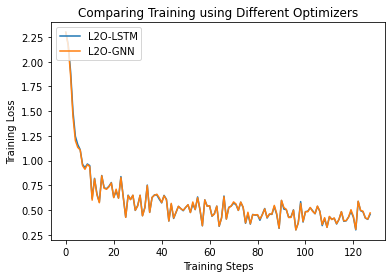

In [20]:
plt.xlabel('Training Steps')
plt.ylabel('Training Loss')
plt.title('Comparing Training using Different Optimizers')

lstm_index = acc_loss_lstm.argmin()
gnn_index = acc_loss_gnn.argmin()

plt.plot(his_lstm[lstm_index], label="L2O-LSTM")
plt.plot(his_gnn[gnn_index], label="L2O-GNN")

plt.legend(loc="upper left")
plt.show()